### Task 1

Сотрудник службы оценки качества продукции заметил, что число бракованных листов
стали в партии для стали марки A больше, чем для стали марки B. Также он обратил
внимание, что при средней скорости прокатки более 4 м/с число бракованных листов
больше. В соответствии с этими наблюдениями, предлагается снизить скорость прокатки
и ввести дополнительные меры контроля качества для стали марки A.

Обоснуйте, что:

1)
Более 3 бракованных листов на партию выходит значимо чаще для стали марки А,
чем для стали марки B.

2)
При скоростях прокатки более 4 м/с свыше 3 бракованных листов стали на партию
выходит значимо чаще, чем при меньших скоростях прокатки.

#### Вопрос 1

In [4]:
import pandas as pd

In [5]:
import seaborn as sns

In [6]:
df = pd.read_csv('Загрузки/Статистика за 2018 год.csv', encoding='cp1251')#читаем данные, решаем проблемы с кодированием

FileNotFoundError: File b'\xd0\xa1\xd1\x82\xd0\xb0\xd1\x82\xd0\xb8\xd1\x81\xd1\x82\xd0\xb8\xd0\xba\xd0\xb0 \xd0\xb7\xd0\xb0 2018 \xd0\xb3\xd0\xbe\xd0\xb4.csv' does not exist

In [8]:
df.head()

,Число бракованных листов,Скорость прокатки,Марка стали
0,3,3.8,A
1,3,3.8,B
2,3,4.8,B
3,4,4.4,B
4,6,5.0,B


Посмотрим на визуализацию данных

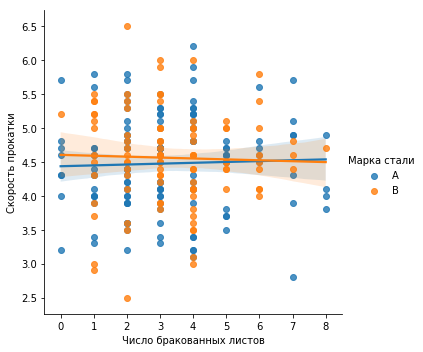

In [14]:
g = sns.lmplot(x="Число бракованных листов", y="Скорость прокатки", hue="Марка стали",
               truncate=True, height=5, data=df)

Заметно, что основное количество бракованных листов приходится на 3-4, при этоь у марки А заметен небольшой восходящий тренд, у марки В  - нисходящий при рассмотрении зависимости брака от скорости прокатки, хотя доверительные интервалы правых оконечностей прямых не дают говорить о статистически значимом различии.

Разобьем число брака по  маркам стали, посмотрим на получившееся распределение.


In [17]:
df.groupby(['Число бракованных листов','Марка стали'])['Число бракованных листов'].count()

Число бракованных листов  Марка стали
0                         A               8
                          B               1
1                         A              16
                          B              14
2                         A              31
                          B              16
3                         A              31
                          B              23
4                         A              25
                          B              23
5                         A              12
                          B               8
6                         A               5
                          B               9
7                         A               7
                          B               3
8                         A               4
                          B               1
Name: Число бракованных листов, dtype: int64

#### df.groupby(['Число бракованных листов','Марка стали'])['Число бракованных листов'].count()
df.groupby(['Марка стали'])['Число бракованных листов'].count().hist()

Для ответа на первый вопрос нам нужны наблюдением с кол-вом брака больше трех. (ИЛИ НЕТ)Посмотрим на статистики этой выборки

In [20]:
df[df.iloc[:,0] > 3].groupby(['Марка стали'])['Число бракованных листов'].count()
#посморим на общее кол-во брака больше трех листов

Марка стали
A    53
B    44
Name: Число бракованных листов, dtype: int64

In [21]:
df[df.iloc[:,0] > 3].groupby(['Марка стали'])['Число бракованных листов'].mean()
#среднее колво листов брака при выборке больше трех бракованных листов

Марка стали
A    5.113208
B    4.886364
Name: Число бракованных листов, dtype: float64

In [ ]:
df.groupby(['Марка стали'])['Число бракованных листов'].mean()
#среднее колво листов брака при выборке больше трех бракованных листов

In [ ]:
df[df.iloc[:,0] > 3].groupby(['Число бракованных листов', 'Марка стали'])['Число бракованных листов'].mean()


Видим, что у марки А среднее несколько выше, чем у марки В. Построим доверительный интервал для средних.

In [92]:
import numpy as np
import scipy as sp
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return 'mean', round(m,3), '+-',round(h,3), 'lower', round(m-h,3),'upper', round(m+h,3)

In [38]:
df[df.iloc[:,0] > 3].groupby(['Марка стали'])['Число бракованных листов'].apply(mean_confidence_interval)

Марка стали
A    (mean, 5.113, lower, 4.744, upper, 5.482)
B    (mean, 4.886, lower, 4.551, upper, 5.222)
Name: Число бракованных листов, dtype: object

#### Провести тест на значимости средних

Таким образом, А чаще В, так как:

#### Вопрос 2

Алгоритм ответа на этот вопрос аналогичен предыдущему: возьмем подвыборку, где кол-во брака больше трех, разделим ее на наблюдения, где скорость меньше 4 м/с и больше, проверим значимость разности средних.

In [43]:
more_3 = df[df.iloc[:,0] > 3]
more_3.head()# выборка с браком больше 3

,Число бракованных листов,Скорость прокатки,Марка стали
3,4,4.4,B
4,6,5.0,B
5,5,4.4,B
11,4,3.9,A
12,7,4.4,B


In [44]:
faster_4 = more_3[more_3.iloc[:,1] > 4.0]#быстрее 4 м/с
slower_4 = more_3[more_3.iloc[:,1] <= 4.0]#медленнее 4 м/с

In [68]:
faster_4['Число бракованных листов'].mean()
#среднее колво листов брака при выборке больше трех бракованных листов и высокой скорости

5.054054054054054

In [69]:
slower_4['Число бракованных листов'].mean()
#среднее колво листов брака при выборке больше трех бракованных листов и низкой скорости

4.869565217391305

Построим доверительные интервалы для для этих двух подвыборок и отдельно по каждой марке стали

In [93]:
mean_confidence_interval(slower_4[slower_4.iloc[:,0] > 3]['Число бракованных листов'])

('mean', 4.87, '+-', 0.588, 'lower', 4.282, 'upper', 5.457)

In [94]:
mean_confidence_interval(faster_4[faster_4.iloc[:,0] > 3]['Число бракованных листов'])

('mean', 5.054, '+-', 0.279, 'lower', 4.775, 'upper', 5.333)

In [61]:
slower_4[slower_4.iloc[:,0] > 3].groupby(['Марка стали'])['Число бракованных листов'].apply(mean_confidence_interval)

Марка стали
A    (mean, 5.286, +-, 0.89, lower, 4.396, upper, 6...
B    (mean, 4.222, +-, 0.512, lower, 3.71, upper, 4...
Name: Число бракованных листов, dtype: object

In [60]:
faster_4[faster_4.iloc[:,0] > 3].groupby(['Марка стали'])['Число бракованных листов'].apply(mean_confidence_interval)

Марка стали
A    (mean, 5.051, +-, 0.414, lower, 4.638, upper, ...
B    (mean, 5.057, +-, 0.39, lower, 4.667, upper, 5...
Name: Число бракованных листов, dtype: object

In [46]:
faster_4.groupby(['Марка стали'])['Число бракованных листов'].mean()
#среднее колво листов брака при выборке больше трех бракованных листов

Марка стали
A    5.051282
B    5.057143
Name: Число бракованных листов, dtype: float64

In [47]:
slower_4.groupby(['Марка стали'])['Число бракованных листов'].mean()
#среднее колво листов брака при выборке больше трех бракованных листов

Марка стали
A    5.285714
B    4.222222
Name: Число бракованных листов, dtype: float64

In [61]:
slower_4[slower_4.iloc[:,0] > 3].groupby(['Марка стали'])['Число бракованных листов'].apply(mean_confidence_interval)

Марка стали
A    (mean, 5.286, +-, 0.89, lower, 4.396, upper, 6...
B    (mean, 4.222, +-, 0.512, lower, 3.71, upper, 4...
Name: Число бракованных листов, dtype: object

In [60]:
faster_4[faster_4.iloc[:,0] > 3].groupby(['Марка стали'])['Число бракованных листов'].apply(mean_confidence_interval)

Марка стали
A    (mean, 5.051, +-, 0.414, lower, 4.638, upper, ...
B    (mean, 5.057, +-, 0.39, lower, 4.667, upper, 5...
Name: Число бракованных листов, dtype: object

#### Проведем тест

Визуализируем результаты

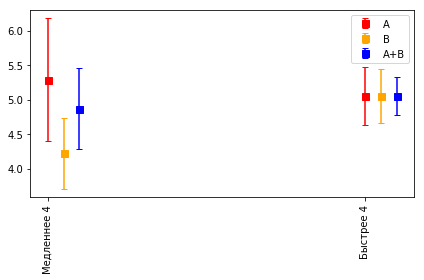

In [110]:
#добавить третий икс по общему
x_ticks = ("Медленнее 4", "Быстрее 4")

x_1 = np.arange(1, 3)# 2 columns
x_2 = x_1 + 0.05# a&b
x_3 = x_1 + 0.1


y_1 = [5.286, 5.051]#a
y_2 = [4.222, 5.057]#b
y_3 = [4.87, 5.054]

err_1 = [0.89, 0.414]
err_2 = [0.512, 0.39]
err_3 = [0.588, 0.279]

plt.errorbar(x=x_1, y=y_1, yerr=err_1, color="red", capsize=3,
             linestyle="None",
             marker="s", markersize=7, mfc="red", mec="red", label = 'A')

plt.errorbar(x=x_2, y=y_2, yerr=err_2, color="orange", capsize=3,
             linestyle="None",
             marker="s", markersize=7, mfc="orange", mec='orange', label = 'B')

plt.errorbar(x=x_3, y=y_3, yerr=err_3, color="blue", capsize=3,
             linestyle="None",
             marker="s", markersize=7, mfc="blue", mec='blue', label = 'A+B')

plt.xticks(x_1, x_ticks, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

Ответ: 

### Task 2

Качество продукции измеряется в лаборатории по пробам, которые забираются _каждый
час_, данные по известным анализам содержатся в файле Y_train.csv. В файле указано
время забора пробы, проба забирается *на выходе из обжиговой машины*.
Вы договорились с заказчиком, что оценкой модели будет являться показатель MAE, для
оценки модели необходимо сгенерировать предсказания за период, указанный в файле
Y_submit.csv (5808 предиктов).

Сырье проходит через обжиговую машину за час.

на основании данных, поступающих каждую
минуту, определяют качество продукции, производимое на обжиговой машине.

В рамках данного задания будем решать задачу регрессии, так как распределение таргета можно свести к непрерывному в рамках определенного промежутка. План действий следующий: анализируем изначальное распределение данных, тестируем несколько алгоритмов, тюнингуем выбранные с помощью GridSearch параметров, предсказываем на отложенной выборке для сабмита.

In [14]:
df = pd.read_csv('Test2/X_data.csv', sep = ';')#читаем данные

In [15]:
df.head()

,Unnamed: 0,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
0,2015-01-01 00:00:00,212,210,211,347,353,347,474,473,481,346,348,355,241,241,243,167.85,9.22
1,2015-01-01 00:01:00,212,211,211,346,352,346,475,473,481,349,348,355,241,241,243,162.51,9.22
2,2015-01-01 00:02:00,212,211,211,345,352,346,476,473,481,352,349,355,242,241,242,164.99,9.22
3,2015-01-01 00:03:00,213,211,211,344,351,346,477,473,481,355,349,355,242,241,242,167.34,9.22
4,2015-01-01 00:04:00,213,211,211,343,350,346,478,473,482,358,349,355,243,241,242,163.04,9.22


In [16]:
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])#проверяем на формат времени

In [17]:
df = df.set_index('Unnamed: 0')#устанаваливаем дату в качестве индекса

In [18]:
df.tail()

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
Unnamed: 0,,,,,,,,,,,,,,,,,
2018-12-31 23:56:00,271,261,265,353,359,353,481,449,491,325,328,328,277,276,280,157.20,8.44
2018-12-31 23:57:00,271,261,265,353,359,353,481,449,491,325,328,328,277,276,280,160.40,8.44
2018-12-31 23:58:00,271,261,265,353,359,353,481,449,491,325,328,328,277,276,280,160.14,8.44
2018-12-31 23:59:00,271,261,265,353,359,353,481,449,491,325,328,328,277,276,280,162.96,8.44
2019-01-01 00:00:00,271,261,265,353,359,353,481,449,491,325,328,328,277,276,280,159.73,7.35


In [19]:
pd.to_datetime('2019-01-01 00:00:00') - pd.to_datetime('2018-05-03 23:05:00 ')
#разница между конечными моментами времени у таргета и регрессоров

Timedelta('242 days 00:55:00')

Проверим на цикличность

In [20]:
df.groupby(df.index.hour).count()#USE MEAN

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
Unnamed: 0,,,,,,,,,,,,,,,,,
0,87661,87661,87661,87661,87661,87661,87661,87661,87661,87661,87661,87661,87661,87661,87661,87661,87661
1,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660
2,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660
3,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660
4,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660
5,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660
6,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660
7,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660
8,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660,87660


In [21]:
df.groupby(df.index.month).count()

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
Unnamed: 0,,,,,,,,,,,,,,,,,
1,178561,178561,178561,178561,178561,178561,178561,178561,178561,178561,178561,178561,178561,178561,178561,178561,178561
2,162720,162720,162720,162720,162720,162720,162720,162720,162720,162720,162720,162720,162720,162720,162720,162720,162720
3,178560,178560,178560,178560,178560,178560,178560,178560,178560,178560,178560,178560,178560,178560,178560,178560,178560
4,172800,172800,172800,172800,172800,172800,172800,172800,172800,172800,172800,172800,172800,172800,172800,172800,172800
5,178560,178560,178560,178560,178560,178560,178560,178560,178560,178560,178560,178560,178560,178560,178560,178560,178560
6,172800,172800,172800,172800,172800,172800,172800,172800,172800,172800,172800,172800,172800,172800,172800,172800,172800
7,178560,178560,178560,178560,178560,178560,178560,178560,178560,178560,178560,178560,178560,178560,178560,178560,178560
8,178560,178560,178560,178560,178560,178560,178560,178560,178560,178560,178560,178560,178560,178560,178560,178560,178560
9,172800,172800,172800,172800,172800,172800,172800,172800,172800,172800,172800,172800,172800,172800,172800,172800,172800


In [22]:
df.groupby(df.index.day).count()

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
Unnamed: 0,,,,,,,,,,,,,,,,,
1,69121,69121,69121,69121,69121,69121,69121,69121,69121,69121,69121,69121,69121,69121,69121,69121,69121
2,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120
3,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120
4,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120
5,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120
6,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120
7,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120
8,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120
9,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120,69120


In [23]:
df.groupby(df.index.hour).mean()#USE MEAN

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
Unnamed: 0,,,,,,,,,,,,,,,,,
0,249.802215,250.428686,250.651533,350.087393,349.806448,349.969473,498.135134,499.391326,500.394440,349.452037,348.454102,349.847127,249.706426,249.264405,249.953275,174.551128,7.527308
1,250.217123,250.226762,250.497547,349.863347,349.857540,350.072736,498.679683,498.936379,499.534212,348.569484,348.038330,348.610210,249.763666,249.987737,249.862868,174.406996,7.484839
2,250.626124,250.445711,250.338558,349.686140,350.245791,350.270659,500.001711,499.323979,500.617842,349.124721,347.885569,348.746030,249.901996,249.438592,249.881246,174.609303,7.470219
3,250.203491,250.187999,250.560769,350.199361,349.710986,349.853399,500.788980,501.210370,502.912902,349.363244,349.088775,349.934942,249.203924,248.607347,249.897410,174.721387,7.484292
4,250.090691,249.778291,250.184440,350.914659,349.365161,350.459046,501.050479,500.903765,502.496190,349.316997,349.881166,350.225382,249.026774,248.658088,249.878622,174.886568,7.483498
5,250.357928,249.203445,249.303822,349.415572,348.683607,350.597604,501.456833,500.111339,501.690201,348.882318,350.002521,350.678964,249.023694,248.987668,249.506548,174.881859,7.420938
6,250.155225,249.567693,249.612400,349.864568,349.591148,350.151027,501.110005,501.252795,502.812355,348.306035,349.787862,349.781018,249.441729,249.595368,249.245813,175.388026,7.540643
7,249.915013,249.293760,249.953593,350.165503,350.116929,350.128941,502.026386,502.156217,503.875006,348.462355,349.399875,349.705989,250.136105,249.878827,249.602635,175.203777,7.528501
8,249.863153,249.411579,249.583607,350.364819,350.479112,349.964568,502.248928,501.757004,502.507700,348.337691,349.036003,350.633915,250.247935,249.619199,249.353559,174.822125,7.497002


In [24]:
df.groupby(df.index.month).mean()

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
Unnamed: 0,,,,,,,,,,,,,,,,,
1,251.514939,252.589653,252.498883,349.198565,348.711953,349.061027,505.840385,506.082409,508.060624,349.546777,347.180823,349.945296,248.680328,248.367040,247.556364,174.699810,7.495718
2,253.166046,251.646472,252.962033,350.646343,351.408419,351.288397,500.542767,498.754406,499.392275,348.070059,345.844979,350.342545,250.583450,251.227323,249.636418,175.668925,7.509487
3,246.207090,246.086554,246.335797,350.590373,351.140491,351.427162,501.013945,499.013458,502.427436,345.981183,348.121337,346.320094,249.896920,250.064880,250.298807,175.598834,7.519294
4,249.121209,248.978756,248.785029,349.356134,348.445388,350.141736,496.511007,494.242002,496.617083,348.925087,349.116806,347.903391,252.233738,252.512703,252.776615,173.040984,7.487510
5,247.897205,248.957124,249.095256,351.265003,350.037371,349.984957,497.553808,497.191661,495.522704,347.957756,348.582135,351.114863,251.586414,250.406698,251.713172,175.768250,7.503169
6,248.748825,249.181701,249.772934,347.281047,346.769508,347.543953,506.059497,503.753900,504.527946,349.309155,350.124549,350.335156,249.173600,250.000671,250.193437,175.603659,7.469160
7,253.316538,252.744069,252.102347,351.219528,349.831715,348.865435,497.929346,501.092165,499.953786,348.638015,349.036856,349.642159,248.870284,250.026955,249.183356,174.329798,7.484587
8,250.541146,249.576938,249.360741,348.161414,348.966980,348.652061,498.229223,500.165059,497.587500,348.738390,350.315026,352.263760,247.997553,248.666241,247.880953,174.424464,7.507228
9,249.342824,250.689219,250.080955,349.343721,348.492720,347.462124,502.074080,504.435775,499.730561,349.230341,350.010625,351.207431,249.793906,248.037917,250.235984,174.029497,7.505566


#### Цикличности не обнаружено. ПОСМОТРЕТЬ ТЕСТЫ НА ЭТО, графики по столбцам на одном полотне

Нам нужно взять период, соответствующий часовым наблюдениям таргета. Сырье обрабатывается час, измерения качества производятся на выходе,будем считать, что для измерения нужно еще 5 минут, выходит разница во времени в один час и пять минут. 

Для составления датасета для обучения нам надо свернуть данные с приборов. Для этого воспользуемся средним и стандартным отклонением, так как это основные характеристики большинства распределений. 

Это можно считать этапом feature engineering.

#### МОМЕНТЫ?

Вырезаем нужный промежуток времени

In [32]:
df = df.iloc[:-24*60*242-60*2]#

In [34]:
df = df.iloc[24*60*3-60:]#

In [36]:
df.head()

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
Unnamed: 0,,,,,,,,,,,,,,,,,
2015-01-03 23:00:00,265,337,263,335,326,340,493,497,527,316,343,336,234,239,237,157.37,4.73
2015-01-03 23:01:00,265,337,263,335,326,341,494,497,529,316,343,336,234,238,237,152.83,4.73
2015-01-03 23:02:00,265,337,263,335,326,341,494,497,530,316,344,336,234,238,238,156.82,4.73
2015-01-03 23:03:00,266,338,263,335,326,341,495,497,532,316,345,336,234,238,238,154.81,4.73
2015-01-03 23:04:00,266,338,263,335,326,341,495,497,534,316,346,336,234,238,238,154.92,4.73


In [30]:
df.shape

(1750981, 17)

#### add max min, season?, разности между счетчиками одного вида, произведения между всеми, полиномы?

In [37]:
dates = df.rename_axis('Dates').index.floor('H')
means = df.groupby([dates]).mean()
means #получаем средние за каждый час

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
Dates,,,,,,,,,,,,,,,,,
2015-01-03 23:00:00,271.216667,338.450000,266.866667,328.800000,329.116667,345.083333,501.333333,499.200000,583.783333,320.116667,360.683333,336.333333,232.383333,236.600000,242.050000,155.854167,4.73
2015-01-04 00:00:00,277.583333,300.366667,273.550000,320.483333,331.966667,355.450000,501.900000,501.650000,705.516667,330.233333,387.133333,336.316667,231.850000,237.683333,236.516667,156.446500,7.90
2015-01-04 01:00:00,273.600000,231.833333,266.800000,322.700000,334.216667,347.133333,501.133333,500.366667,579.600000,341.550000,398.683333,334.350000,237.016667,245.683333,231.966667,156.000167,6.96
2015-01-04 02:00:00,250.333333,227.033333,256.350000,326.583333,333.666667,317.716667,511.183333,498.116667,492.366667,345.350000,395.066667,332.233333,248.850000,254.150000,244.783333,156.047000,7.29
2015-01-04 03:00:00,240.400000,239.350000,249.250000,325.750000,325.400000,310.500000,522.683333,498.966667,538.716667,341.283333,379.883333,337.816667,260.000000,260.516667,248.550000,188.481667,7.11
2015-01-04 04:00:00,227.366667,231.133333,235.866667,320.233333,317.183333,320.066667,516.683333,504.433333,515.666667,345.583333,365.300000,345.883333,265.866667,264.950000,273.866667,194.080500,7.97
2015-01-04 05:00:00,218.350000,213.283333,206.133333,312.833333,315.750000,311.566667,499.666667,508.283333,499.316667,342.166667,354.183333,344.666667,269.233333,268.083333,265.250000,194.363167,7.71
2015-01-04 06:00:00,209.800000,208.700000,209.816667,310.000000,325.366667,310.616667,510.350000,500.483333,470.216667,339.333333,346.500000,341.250000,268.750000,269.583333,272.966667,193.785667,8.63
2015-01-04 07:00:00,191.533333,210.383333,207.683333,310.166667,313.016667,315.516667,499.350000,499.300000,506.266667,367.183333,342.433333,343.166667,263.533333,264.566667,270.616667,193.764500,7.78


In [38]:
import numpy as np

devs = df.groupby([dates]).apply(np.std)
devs#получаем отклонения за каждый час

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
Dates,,,,,,,,,,,,,,,,,
2015-01-03 23:00:00,3.332125,2.940663,3.063041,3.948839,2.989379,3.012705,3.533962,1.208305,36.912551,2.665156,9.805596,0.471405,0.838484,0.820569,2.020107,1.754112,1.776357e-15
2015-01-04 00:00:00,0.613505,20.265707,0.617117,0.785104,1.702612,1.986832,1.748333,0.476970,19.594635,3.137763,5.505956,0.465176,0.702970,1.543715,4.189239,1.955126,8.881784e-15
2015-01-04 01:00:00,2.870540,12.837662,3.429286,1.705872,1.018032,6.822675,1.347426,0.773879,83.651300,3.263051,1.372245,0.872258,2.533059,2.741603,2.456058,1.717608,6.217249e-15
2015-01-04 02:00:00,6.697429,6.204747,2.554897,0.556527,2.038518,7.465681,4.485130,0.321023,31.021480,1.759024,3.224214,0.422953,4.040730,2.174281,2.696242,1.765500,7.105427e-15
2015-01-04 03:00:00,1.772005,0.909670,1.669581,1.026726,2.557342,3.170173,1.419996,0.982627,5.222042,0.450617,4.733187,3.030356,2.258318,1.575771,4.345208,13.567137,1.776357e-15
2015-01-04 04:00:00,5.385062,5.181591,7.317711,2.297583,2.164037,1.046688,4.652926,2.261022,5.667647,1.519777,3.725140,1.225992,1.334999,1.131739,5.502929,1.542061,1.243450e-14
2015-01-04 05:00:00,1.107926,3.864762,6.357323,1.634693,6.355116,4.447346,4.085204,2.852436,7.130899,3.205031,2.753735,1.534782,0.738617,0.780847,2.126225,1.810028,7.105427e-15
2015-01-04 06:00:00,3.986644,1.173314,1.419996,0.000000,9.826777,3.759839,3.511054,5.041467,11.730433,4.706969,1.746425,0.433013,0.976815,0.493007,1.264472,1.910591,3.552714e-15
2015-01-04 07:00:00,6.162972,0.486198,0.865865,0.372678,4.573444,5.503004,1.222361,3.844043,26.928217,6.766318,0.692018,1.343710,1.944794,2.654347,1.438653,1.893832,1.243450e-14


In [39]:
means.shape

(29184, 17)

Посмотрим, что с таргетом

In [40]:
y_train = pd.read_csv('Test2/Y_train.csv', sep = ';', header = None)

In [41]:
y_train.shape

(29184, 2)

In [42]:
y_train.head()

,0,1
0,2015-01-04 00:05:00,392
1,2015-01-04 01:05:00,384
2,2015-01-04 02:05:00,393
3,2015-01-04 03:05:00,399
4,2015-01-04 04:05:00,400


In [43]:
y_train.tail()

,0,1
29179,2018-05-03 19:05:00,438
29180,2018-05-03 20:05:00,452
29181,2018-05-03 21:05:00,455
29182,2018-05-03 22:05:00,455
29183,2018-05-03 23:05:00,454


Посмотрим на распределение таргета

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd54d0ee10>]],
      dtype=object)

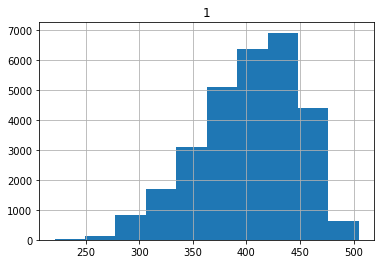

In [45]:
y_train.hist()

Распределение напоминает нормальное, но скошенно вправо. Разрывов не наблюдается

Получим же наконец датасет для тренировки модели

In [46]:
# mod = pd.concat([means.reset_index(), y_train], axis = 1)
# mod

In [47]:
mod2 = pd.concat([means.reset_index(), devs.reset_index().iloc[:, 1:-2], y_train], axis = 1)
mod2

,Dates,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,...,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,0,1
0,2015-01-03 23:00:00,271.216667,338.450000,266.866667,328.800000,329.116667,345.083333,501.333333,499.200000,583.783333,...,1.208305,36.912551,2.665156,9.805596,0.471405,0.838484,0.820569,2.020107,2015-01-04 00:05:00,392
1,2015-01-04 00:00:00,277.583333,300.366667,273.550000,320.483333,331.966667,355.450000,501.900000,501.650000,705.516667,...,0.476970,19.594635,3.137763,5.505956,0.465176,0.702970,1.543715,4.189239,2015-01-04 01:05:00,384
2,2015-01-04 01:00:00,273.600000,231.833333,266.800000,322.700000,334.216667,347.133333,501.133333,500.366667,579.600000,...,0.773879,83.651300,3.263051,1.372245,0.872258,2.533059,2.741603,2.456058,2015-01-04 02:05:00,393
3,2015-01-04 02:00:00,250.333333,227.033333,256.350000,326.583333,333.666667,317.716667,511.183333,498.116667,492.366667,...,0.321023,31.021480,1.759024,3.224214,0.422953,4.040730,2.174281,2.696242,2015-01-04 03:05:00,399
4,2015-01-04 03:00:00,240.400000,239.350000,249.250000,325.750000,325.400000,310.500000,522.683333,498.966667,538.716667,...,0.982627,5.222042,0.450617,4.733187,3.030356,2.258318,1.575771,4.345208,2015-01-04 04:05:00,400
5,2015-01-04 04:00:00,227.366667,231.133333,235.866667,320.233333,317.183333,320.066667,516.683333,504.433333,515.666667,...,2.261022,5.667647,1.519777,3.725140,1.225992,1.334999,1.131739,5.502929,2015-01-04 05:05:00,417
6,2015-01-04 05:00:00,218.350000,213.283333,206.133333,312.833333,315.750000,311.566667,499.666667,508.283333,499.316667,...,2.852436,7.130899,3.205031,2.753735,1.534782,0.738617,0.780847,2.126225,2015-01-04 06:05:00,408
7,2015-01-04 06:00:00,209.800000,208.700000,209.816667,310.000000,325.366667,310.616667,510.350000,500.483333,470.216667,...,5.041467,11.730433,4.706969,1.746425,0.433013,0.976815,0.493007,1.264472,2015-01-04 07:05:00,404
8,2015-01-04 07:00:00,191.533333,210.383333,207.683333,310.166667,313.016667,315.516667,499.350000,499.300000,506.266667,...,3.844043,26.928217,6.766318,0.692018,1.343710,1.944794,2.654347,1.438653,2015-01-04 08:05:00,405
9,2015-01-04 08:00:00,189.550000,211.000000,211.183333,311.000000,309.183333,307.916667,505.216667,500.416667,529.066667,...,8.822871,14.338604,7.535306,4.794065,2.556636,0.950292,2.118372,0.703957,2015-01-04 09:05:00,405


In [48]:
mod2.columns = ['Dates', 'T_data_1_1', 'T_data_1_2', 'T_data_1_3', 'T_data_2_1',
       'T_data_2_2', 'T_data_2_3', 'T_data_3_1', 'T_data_3_2', 'T_data_3_3',
       'T_data_4_1', 'T_data_4_2', 'T_data_4_3', 'T_data_5_1', 'T_data_5_2',
       'T_data_5_3',     'H_data',    'AH_data', '_data_1_1', '_data_1_2',
       '_data_1_3', '_data_2_1', '_data_2_2', '_data_2_3', '_data_3_1',
       '_data_3_2', '_data_3_3', '_data_4_1', '_data_4_2', '_data_4_3',
       '_data_5_1', '_data_5_2', '_data_5_3',            0,            1]

#### Model

In [104]:
# from sklearn.cross_validation import train_test_split


# (X_train_num, 
#  X_test_num, 
#  y_train_, y_test_) = train_test_split(mod.iloc[:, 1:-2], mod.iloc[:, -1:], 
#                                      test_size=0.3, 
#                                      random_state=0)

In [50]:
from sklearn.cross_validation import train_test_split

#разделим датасет на трейн и тест
(X_train_num, 
 X_test_num, 
 y_train_, y_test_) = train_test_split(mod2.iloc[:, 1:-2], mod2.iloc[:, -1:], 
                                     test_size=0.3, 
                                     random_state=0)

In [58]:
from sklearn.metrics import mean_absolute_error

Для начала посмотрим на то, как заведутся алгоритмы из коробки. Были выбраны непараметрический алгоритм (KNN), алгоритмы на деревьях (RAndom Forest, XGBoost)  и квазилинейные алгоритмы (метод опорных векторов). Логистическая регрессия долго считалась, поэтому даже не была включена в изначальный список.

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.svm import SVR

classifier = [SVR(),
              RandomForestRegressor(random_state = 0, n_jobs = -1, criterion='mae'),
              KNeighborsRegressor(n_neighbors=20, n_jobs = -1),
              xgb.XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=40, min_child_weight=3, n_jobs = -1)]



In [71]:
for model in classifier:
    model.fit(X_train_num, y_train_.values[:,0])
    pred = model.predict(X_test_num)#[:,1]
    mae = mean_absolute_error(y_test_, pred)
    print(model, '\t', mae)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 	 37.965963717721266
RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False) 	 9.312951119232528
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
          weights='uniform') 	 11.088310872544541
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=3, missing=None, n_estimators=40,
       n_jobs=-1, nthread=None, obje

SVR показала себя хуже всего, остальные алгоритмы попробуем потюнинговать и выбрать наиболее эффективных. Используем кросс-валидацию на 3 фолдах.

In [102]:
classifier = [
              RandomForestRegressor(random_state = 0, n_jobs = -1, criterion='mae'),
              KNeighborsRegressor(n_neighbors=20, n_jobs = -1),
              xgb.XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=40, min_child_weight=3, n_jobs = -1)
]


In [103]:
#задаем параметры для перебора
param_grid_rand = {'max_features' : ['auto','sqrt'],               
                   'max_depth' : [5,7,10,15]}
param_grid_knn = {'n_neighbors':[10,15,20],
                  'weights':['uniform', 'distance'],
                  'p': [1, 2]}
param_grid_xgb = {'max_depth' :[2,5,7,10],
                 'learning_rate' : [0.01, 0,1, 1],
                 'gamma' : [0.01, 0.1],
                 'n_estimators' : [20, 30, 40, 50] }


param_grid = [param_grid_rand, param_grid_knn, param_grid_xgb]

In [104]:
%%time

scores2 = []
model_name = []
for i in enumerate(classifier):
    grid_cv = GridSearchCV(classifier[i[0]], param_grid[i[0]],  
                           cv = 3, n_jobs=-1, scoring='neg_mean_absolute_error')
    grid = grid_cv.fit(X_train_num, y_train_.values[:,0])
    print(classifier[i[0]], grid_cv.best_params_)
    pred = grid_cv.best_estimator_.predict(X_test_num)#[:,1]
    
    model_name.append(classifier[i[0]].__class__.__name__) 
    scores2.append(mean_absolute_error(y_test_, pred))

results2 = pd.DataFrame(data=scores2, columns=['MAE'])
results2['Algorithm']=model_name

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False) {'max_depth': 15, 'max_features': 'auto'}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
          weights='uniform') {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=3, missing=None, n_estimators=40,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=

In [105]:
results2

,MAE,Algorithm
0,9.292439,RandomForestRegressor
1,9.431730,KNeighborsRegressor
2,10.468789,XGBRegressor


Случайный лес показал себя лучше всего. Зафитим его на всем датасете и сделаем сабмит. Для посмотрим на новый таргет и предобработаем данные регрессоров за соответствующий период

#### Submit

In [107]:
test = pd.read_csv('Test2/Y_submit.csv', sep = ';', header = None)

In [108]:
test.head()

,0,1
0,2018-05-04 00:05:00,420
1,2018-05-04 01:05:00,420
2,2018-05-04 02:05:00,420
3,2018-05-04 03:05:00,420
4,2018-05-04 04:05:00,420


In [109]:
test.tail()

,0,1
5803,2018-12-31 19:05:00,420
5804,2018-12-31 20:05:00,420
5805,2018-12-31 21:05:00,420
5806,2018-12-31 22:05:00,420
5807,2018-12-31 23:05:00,420


In [110]:
test.shape

(5808, 2)

In [111]:
df1 = pd.read_csv('Test2/X_data.csv', sep = ';')

In [112]:
df1 = df1.iloc[-24*60*242-60*1:-60-1]

In [113]:
df1.tail()

,Unnamed: 0,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
2103775,2018-12-31 22:55:00,271,256,262,357,359,360,481,449,491,325,332,327,277,276,280,154.92,6.13
2103776,2018-12-31 22:56:00,271,255,262,357,359,360,481,449,491,325,332,327,277,276,280,159.26,6.13
2103777,2018-12-31 22:57:00,271,254,262,357,359,360,481,449,491,325,332,328,277,276,280,161.05,6.13
2103778,2018-12-31 22:58:00,271,253,262,357,359,360,481,449,491,325,332,328,277,276,280,160.32,6.13
2103779,2018-12-31 22:59:00,271,252,262,357,359,360,481,449,491,325,332,328,277,276,280,158.21,6.13


In [114]:
df1['Unnamed: 0'] = pd.to_datetime(df1['Unnamed: 0'])

df1 = df1.set_index('Unnamed: 0')

dates1 = df1.rename_axis('Dates').index.floor('H')
means1 = df1.groupby([dates1]).mean()
means1

# import numpy as np

devs1 = df1.groupby([dates1]).apply(np.std)
devs1

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
Dates,,,,,,,,,,,,,,,,,
2018-05-03 23:00:00,1.344870,0.974539,1.081032,0.883960,18.384308,1.315936,7.082312,6.547815,0.994093,2.812538,6.294186,54.308391,1.994534,5.156388,2.389770,1.573865,8.881784e-15
2018-05-04 00:00:00,0.776567,0.971110,1.499166,1.156023,169.946018,2.038518,3.403389,1.695992,3.064990,4.802170,1.613399,96.162357,2.774687,3.537851,1.222929,1.981964,1.776357e-15
2018-05-04 01:00:00,0.858131,0.422953,12.185271,3.149030,75.669978,4.024198,11.883450,9.023980,7.942921,5.558677,1.084743,11.872693,3.448792,2.486407,6.016159,1.755106,9.769963e-15
2018-05-04 02:00:00,3.905125,1.126820,11.522574,3.222146,75.251955,4.773073,3.750407,11.122188,6.607992,4.299225,4.278986,5.236093,4.046775,2.200694,1.710994,1.837533,6.217249e-15
2018-05-04 03:00:00,4.326918,6.932592,9.574431,0.386940,6.967703,8.472439,4.902692,2.283942,1.022524,7.329147,23.504911,1.308519,0.718022,6.552268,0.465176,2.602722,1.243450e-14
2018-05-04 04:00:00,3.739095,3.044622,1.429452,2.103172,2.651205,31.692950,3.714050,1.022524,1.573655,3.461655,16.946484,3.602892,6.002407,1.074321,0.957282,1.870830,5.329071e-15
2018-05-04 05:00:00,1.609002,3.712554,3.220205,8.945188,5.625438,76.596707,2.479863,2.153228,8.935510,2.400000,33.570237,2.592457,5.517548,3.696056,4.812570,2.285538,1.776357e-15
2018-05-04 06:00:00,4.360014,1.379513,3.452053,6.563028,8.426331,10.429872,1.550179,4.406151,8.780407,1.321930,49.529273,2.264214,1.575771,1.775997,4.311322,1.898089,5.329071e-15
2018-05-04 07:00:00,3.734077,0.613505,6.259992,6.977324,1.425560,25.044244,1.229724,0.737111,34.290669,1.418528,61.882440,0.422953,1.848423,0.476970,0.499722,1.975775,5.329071e-15


In [115]:
means1.shape

(5808, 17)

In [116]:
mod3 = pd.concat([means1.reset_index(), devs1.reset_index().iloc[:, 1:-2]], axis = 1)
mod3

,Dates,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,...,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3
0,2018-05-03 23:00:00,256.525424,258.610169,257.813559,347.711864,340.016949,352.881356,460.898305,445.203390,439.830508,...,1.315936,7.082312,6.547815,0.994093,2.812538,6.294186,54.308391,1.994534,5.156388,2.389770
1,2018-05-04 00:00:00,257.383333,261.916667,253.950000,348.116667,91.133333,354.333333,472.816667,434.416667,446.650000,...,2.038518,3.403389,1.695992,3.064990,4.802170,1.613399,96.162357,2.774687,3.537851,1.222929
2,2018-05-04 01:00:00,255.716667,262.766667,274.050000,355.483333,-97.233333,364.850000,466.516667,452.966667,464.100000,...,4.024198,11.883450,9.023980,7.942921,5.558677,1.084743,11.872693,3.448792,2.486407,6.016159
3,2018-05-04 02:00:00,263.500000,261.783333,268.716667,367.866667,221.100000,381.133333,485.366667,490.883333,492.966667,...,4.773073,3.750407,11.122188,6.607992,4.299225,4.278986,5.236093,4.046775,2.200694,1.710994
4,2018-05-04 03:00:00,278.666667,275.350000,293.783333,373.816667,351.133333,376.466667,502.383333,513.683333,503.233333,...,8.472439,4.902692,2.283942,1.022524,7.329147,23.504911,1.308519,0.718022,6.552268,0.465176
5,2018-05-04 04:00:00,292.450000,295.216667,311.700000,370.100000,353.933333,384.916667,517.350000,511.766667,496.083333,...,31.692950,3.714050,1.022524,1.573655,3.461655,16.946484,3.602892,6.002407,1.074321,0.957282
6,2018-05-04 05:00:00,302.333333,292.983333,305.116667,388.316667,373.766667,364.333333,528.016667,513.616667,509.700000,...,76.596707,2.479863,2.153228,8.935510,2.400000,33.570237,2.592457,5.517548,3.696056,4.812570
7,2018-05-04 06:00:00,296.416667,283.216667,293.500000,392.400000,362.883333,222.133333,534.616667,525.450000,538.733333,...,10.429872,1.550179,4.406151,8.780407,1.321930,49.529273,2.264214,1.575771,1.775997,4.311322
8,2018-05-04 07:00:00,282.300000,281.583333,278.750000,363.016667,346.033333,285.050000,539.233333,534.300000,510.500000,...,25.044244,1.229724,0.737111,34.290669,1.418528,61.882440,0.422953,1.848423,0.476970,0.499722
9,2018-05-04 08:00:00,271.300000,276.766667,276.316667,354.350000,349.883333,348.950000,542.633333,534.750000,478.066667,...,12.418300,0.912262,0.787930,14.774828,1.725221,60.464174,0.442217,2.216792,1.666250,3.323778


In [118]:
mod3.columns = ['Dates', 'T_data_1_1', 'T_data_1_2', 'T_data_1_3', 'T_data_2_1',
       'T_data_2_2', 'T_data_2_3', 'T_data_3_1', 'T_data_3_2', 'T_data_3_3',
       'T_data_4_1', 'T_data_4_2', 'T_data_4_3', 'T_data_5_1', 'T_data_5_2',
       'T_data_5_3',     'H_data',    'AH_data', '_data_1_1', '_data_1_2',
       '_data_1_3', '_data_2_1', '_data_2_2', '_data_2_3', '_data_3_1',
       '_data_3_2', '_data_3_3', '_data_4_1', '_data_4_2', '_data_4_3',
       '_data_5_1', '_data_5_2', '_data_5_3']

In [133]:
classifier = RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False) 

In [134]:
%%time

classifier.fit(mod2.iloc[:, 1:-2], mod2.iloc[:, -1:].values[:,0])

pred = classifier.predict(mod3.iloc[:, 1:])

CPU times: user 6min 40s, sys: 107 ms, total: 6min 40s
Wall time: 2min 1s


In [135]:
mae = mean_absolute_error(test[1], pred)

print(mae)

37.30596590909091


In [128]:
pred

array([449.  , 433.35, 437.75, ..., 454.35, 444.6 , 442.3 ])

#### Наложить на график теста 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd39a1afd0>]],
      dtype=object)

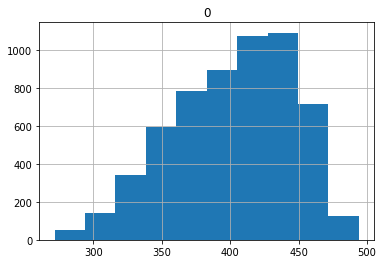

In [152]:
pd.DataFrame(pred).hist()#распределение предиктов

#### Пути улучшения

Как видим, ошибка на отложенной выборке достаточно большая. Попробуем сравнить ее с моделью, где в качестве предикта возьмем среднее, так как у нас в качестве метрики MAE, то это даст оценку разброса ошибок.

In [143]:
test[1].shape

(5808,)

In [145]:
mae = mean_absolute_error(test[1], [mod2.iloc[:, -1:].values[:,0].mean()]*5808)

print(mae)

17.19925301535091


ГЕНИАЛЬНО. Элементарный предикт оказался лучше обученного алгоритма. Как показывают недавние хакатоны, например, от Газпрома, такое часто случается на промышленных данных. Попробуем зафититься на всем нашем датасете.

In [155]:
classifier = [
              RandomForestRegressor(random_state = 0, n_jobs = -1, criterion='mae'),
              KNeighborsRegressor(n_neighbors=20, n_jobs = -1),
              xgb.XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=40, min_child_weight=3, n_jobs = -1)
]


In [156]:
#задаем параметры для перебора
param_grid_rand = {'max_features' : ['auto','sqrt'],               
                   'max_depth' : [5,7,10,15]}
param_grid_knn = {'n_neighbors':[10,15,20],
                  'weights':['uniform', 'distance'],
                  'p': [1, 2]}
param_grid_xgb = {'max_depth' :[2,5,7,10],
                 'learning_rate' : [0.01, 0,1, 1],
                 'gamma' : [0.01, 0.1],
                 'n_estimators' : [20, 30, 40, 50] }


param_grid = [param_grid_rand, param_grid_knn, param_grid_xgb]

In [158]:
%%time

scores2 = []
model_name = []
for i in enumerate(classifier):
    grid_cv = GridSearchCV(classifier[i[0]], param_grid[i[0]],  
                           cv = 3, n_jobs=-1, scoring='neg_mean_absolute_error')
    grid = grid_cv.fit(mod2.iloc[:, 1:-2], mod2.iloc[:, -1:].values[:,0])
    print(classifier[i[0]], grid_cv.best_params_)
    pred = grid_cv.best_estimator_.predict(mod3.iloc[:, 1:])#[:,1]
    
    model_name.append(classifier[i[0]].__class__.__name__) 
    scores2.append(mean_absolute_error(test[1], pred))

results2 = pd.DataFrame(data=scores2, columns=['MAE'])
results2['Algorithm']=model_name

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False) {'max_depth': 15, 'max_features': 'auto'}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
          weights='uniform') {'n_neighbors': 20, 'p': 1, 'weights': 'distance'}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=3, missing=None, n_estimators=40,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=

In [159]:
results2

,MAE,Algorithm
0,37.305966,RandomForestRegressor
1,35.654450,KNeighborsRegressor
2,38.592178,XGBRegressor


Пути улучшения:
    
   - Feature engineering. Добавить новые фичи при свертке данных датчиков, например, моменты распределения, полиномиальные фичи, применить PCA
    
   - Рассмотреть задачку как предсказание временного ряда и применить SARIMA
    
   - Не сворачивать данные датчиков, а развернуть данные лаборатории. Это дало бы больший датасет